<a href="https://colab.research.google.com/github/Iamfouzia/AI_Machine_Learning_projects/blob/main/Variational_Autoencoder_(VAE)_for_Image_Generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


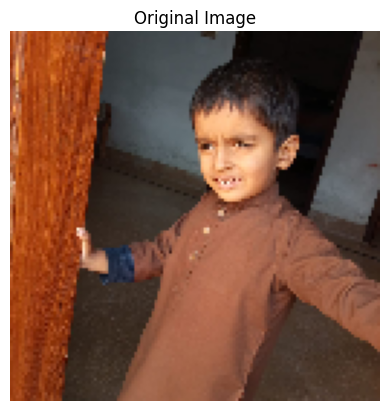

Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_12      │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_12 (Conv2D)  │ (None, 64, 64,    │        896 │ input_layer_12[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_13 (Conv2D)  │ (None, 32, 32,    │     18,496 │ conv2d_12[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_6 (Flatten) │ (None, 65536)     │          0 │ conv2d_13[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_20 (Dense)    │ (None, 128)       │  8,388,736 │ flatten_6[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_21 (Dense)    │ (None, 64)        │      8,256 │ dense_20[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_22 (Dense)    │ (None, 64)        │      8,256 │ dense_20[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_5 (Lambda)   │ (None, 64)        │          0 │ dense_21[0][0],   │
│                     │                   │            │ dense_22[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 8,424,640 (32.14 MB)

 Trainable params: 8,424,640 (32.14 MB)

 Non-trainable params: 0 (0.00 B)

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_13 (InputLayer)     │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 65536)          │     4,259,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_6 (Reshape)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_18             │ (None, 64, 64, 64)     │        36,928 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_19             │ (None, 128, 128, 32)   │        18,464 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_20             │ (None, 128, 128, 3)    │           867 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,316,099 (16.46 MB)

 Trainable params: 4,316,099 (16.46 MB)

 Non-trainable params: 0 (0.00 B)

✅ Training Complete!


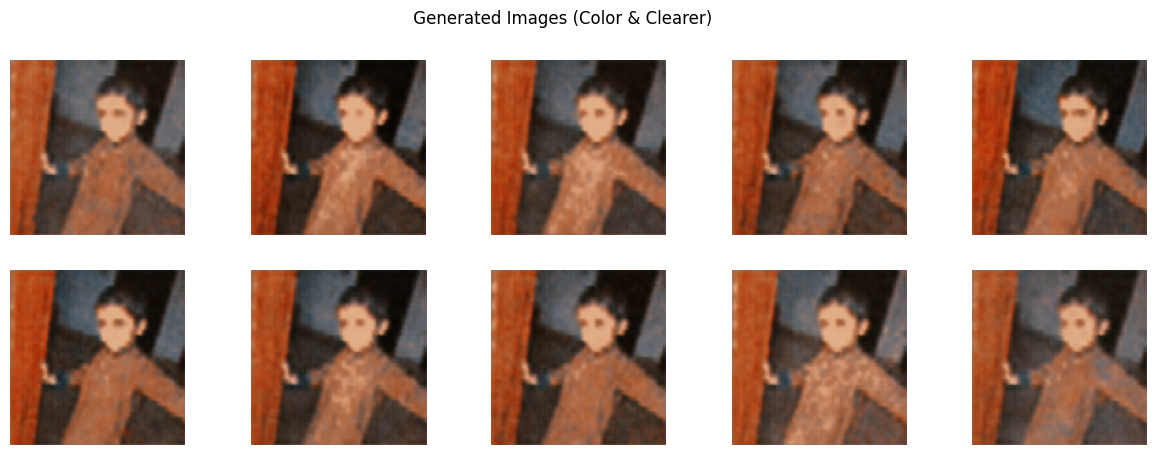

In [ ]:
# Variational Autoencoder (VAE) - Generate Images

# STEP 1: Mount Drive
from google.colab import drive
drive.mount('/content/drive')

# STEP 2: Import Libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

# STEP 3: Load Your Image
image_path = "/content/drive/MyDrive/mm.jpg"

# Read image using OpenCV
img = cv2.imread(image_path)
if img is None:
    raise FileNotFoundError("Image not found. Double-check your filename and Drive path!")

# Convert BGR (OpenCV format) to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Resize image for VAE
img = cv2.resize(img, (128, 128))
img = img.astype('float32') / 255.0
img = np.expand_dims(img, axis=0)

plt.imshow(img[0])
plt.title("Original Image")
plt.axis("off")
plt.show()

# STEP 4: Encoder
latent_dim = 64

encoder_inputs = layers.Input(shape=(128, 128, 3))
x = layers.Conv2D(32, 3, activation="relu", strides=2, padding="same")(encoder_inputs)
x = layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Flatten()(x)
x = layers.Dense(128, activation="relu")(x)
z_mean = layers.Dense(latent_dim)(x)
z_log_var = layers.Dense(latent_dim)(x)

def sampling(args):
    z_mean, z_log_var = args
    epsilon = tf.random.normal(shape=(tf.shape(z_mean)[0], latent_dim))
    return z_mean + tf.exp(0.5 * z_log_var) * epsilon

z = layers.Lambda(sampling)([z_mean, z_log_var])
encoder = models.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
encoder.summary()

# STEP 5: Decoder
latent_inputs = layers.Input(shape=(latent_dim,))
x = layers.Dense(32 * 32 * 64, activation="relu")(latent_inputs)
x = layers.Reshape((32, 32, 64))(x)
x = layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)
decoder_outputs = layers.Conv2DTranspose(3, 3, activation="sigmoid", padding="same")(x)
decoder = models.Model(latent_inputs, decoder_outputs, name="decoder")
decoder.summary()

# STEP 6: VAE Model
class VAE(models.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder

    def compile(self, optimizer):
        super(VAE, self).compile()
        self.optimizer = optimizer
        self.total_loss_tracker = tf.keras.metrics.Mean(name="total_loss")

    def train_step(self, data):
        if isinstance(data, tuple):
            data = data[0]
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            reconstruction_loss = tf.reduce_mean(tf.square(data - reconstruction))
            kl_loss = -0.5 * tf.reduce_mean(
                1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var)
            )
            total_loss = reconstruction_loss + kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        return {"loss": self.total_loss_tracker.result()}

vae = VAE(encoder, decoder)
vae.compile(optimizer=tf.keras.optimizers.Adam())

# STEP 7: Train VAE
vae.fit(img, epochs=500, batch_size=1, verbose=0)
print("✅ Training Complete!")

# STEP 8: Generate New Images
num_images = 10
generated_images = []

for i in range(num_images):
    random_latent = tf.random.normal(shape=(1, latent_dim))
    gen_img = decoder(random_latent)
    generated_images.append(gen_img[0].numpy())

# STEP 9: Display Results
plt.figure(figsize=(15, 5))
for i in range(num_images):
    plt.subplot(2, 5, i + 1)
    plt.imshow(generated_images[i])
    plt.axis("off")
plt.suptitle(" Generated Images (Color & Clearer)")
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128444 (\N{FRAME WITH PICTURE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


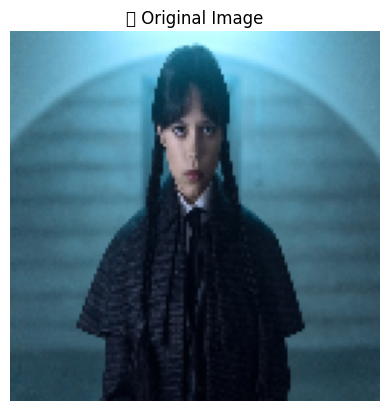

Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 64, 64,    │        896 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 32, 32,    │     18,496 │ conv2d[0][0]      │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 65536)     │          0 │ conv2d_1[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │  8,388,736 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 64)        │      8,256 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 64)        │      8,256 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda (Lambda)     │ (None, 64)        │          0 │ dense_1[0][0],    │
│                     │                   │            │ dense_2[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 8,424,640 (32.14 MB)

 Trainable params: 8,424,640 (32.14 MB)

 Non-trainable params: 0 (0.00 B)

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 65536)          │     4,259,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 64, 64, 64)     │        36,928 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 128, 128, 32)   │        18,464 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 128, 128, 3)    │           867 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,316,099 (16.46 MB)

 Trainable params: 4,316,099 (16.46 MB)

 Non-trainable params: 0 (0.00 B)

🚀 Training VAE on your image...
✅ Training Complete!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


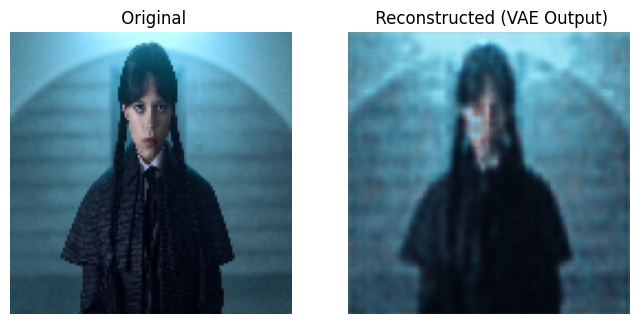

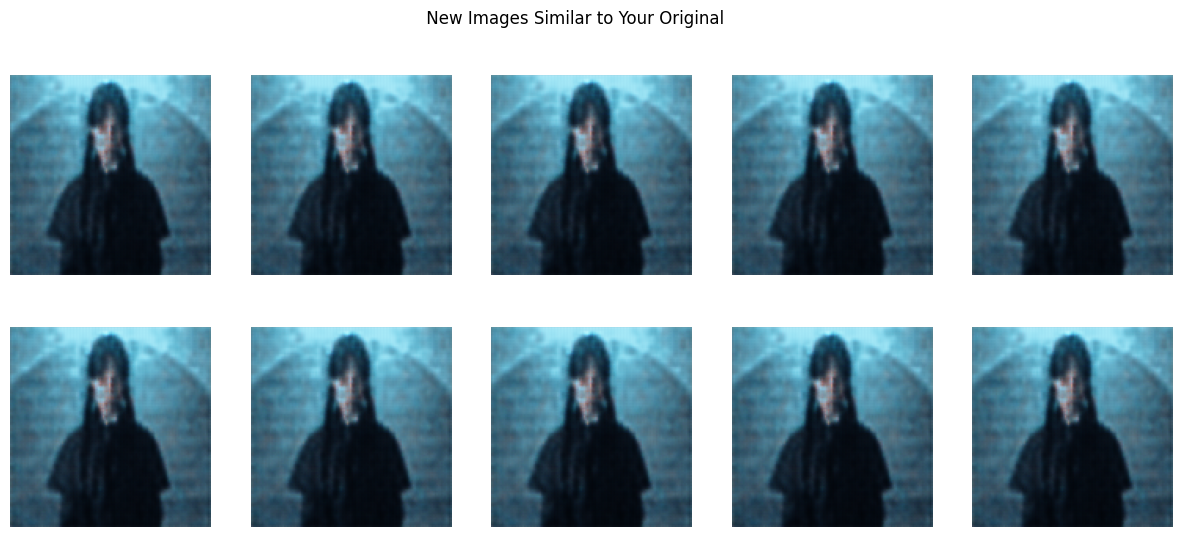

In [ ]:
#  Variational Autoencoder (VAE) - Image Generation

# STEP 1: Mount Drive
from google.colab import drive
drive.mount('/content/drive')

# STEP 2: Import Libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

# STEP 3: Load Your Image
image_path = "/content/drive/MyDrive/wed.jpg"

# Read image using OpenCV
img = cv2.imread(image_path)
if img is None:
    raise FileNotFoundError(" Image not found. Double-check your filename and Drive path!")

# Convert BGR → RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Resize for model input
img = cv2.resize(img, (128, 128))
img = img.astype('float32') / 255.0
img = np.expand_dims(img, axis=0)  # Shape (1, 128, 128, 3)

plt.imshow(img[0])
plt.title("🖼️ Original Image")
plt.axis("off")
plt.show()

# STEP 4: Build Encoder
latent_dim = 64

encoder_inputs = layers.Input(shape=(128, 128, 3))
x = layers.Conv2D(32, 3, activation="relu", strides=2, padding="same")(encoder_inputs)
x = layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Flatten()(x)
x = layers.Dense(128, activation="relu")(x)
z_mean = layers.Dense(latent_dim)(x)
z_log_var = layers.Dense(latent_dim)(x)

def sampling(args):
    z_mean, z_log_var = args
    epsilon = tf.random.normal(shape=(tf.shape(z_mean)[0], latent_dim))
    return z_mean + tf.exp(0.5 * z_log_var) * epsilon

z = layers.Lambda(sampling)([z_mean, z_log_var])
encoder = models.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
encoder.summary()

# STEP 5: Build Decoder
latent_inputs = layers.Input(shape=(latent_dim,))
x = layers.Dense(32 * 32 * 64, activation="relu")(latent_inputs)
x = layers.Reshape((32, 32, 64))(x)
x = layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)
decoder_outputs = layers.Conv2DTranspose(3, 3, activation="sigmoid", padding="same")(x)
decoder = models.Model(latent_inputs, decoder_outputs, name="decoder")
decoder.summary()

# STEP 6: Define Custom VAE Class
class VAE(models.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder

    def compile(self, optimizer):
        super(VAE, self).compile()
        self.optimizer = optimizer
        self.total_loss_tracker = tf.keras.metrics.Mean(name="total_loss")

    def train_step(self, data):
        if isinstance(data, tuple):
            data = data[0]
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            reconstruction_loss = tf.reduce_mean(tf.square(data - reconstruction))
            kl_loss = -0.5 * tf.reduce_mean(
                1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var)
            )
            total_loss = reconstruction_loss + kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        return {"loss": self.total_loss_tracker.result()}

vae = VAE(encoder, decoder)
vae.compile(optimizer=tf.keras.optimizers.Adam())

# STEP 7: Train the Model
print("Training VAE on your image...")
vae.fit(img, epochs=1000, batch_size=1, verbose=0)
print("✅ Training Complete!")

# STEP 8: Reconstruct the Original Image
z_mean, z_log_var, z = encoder.predict(img)
reconstructed_img = decoder.predict(z)

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(img[0])
plt.title(" Original")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(reconstructed_img[0])
plt.title(" Reconstructed (VAE Output)")
plt.axis("off")
plt.show()

# STEP 9: Generate New Similar Images
num_images = 10
generated_images = []

for i in range(num_images):
    # Add small random variation to latent space around the original image
    random_latent = z + tf.random.normal(shape=(1, latent_dim), mean=0.0, stddev=0.2)
    gen_img = decoder(random_latent)
    generated_images.append(gen_img[0].numpy())

# STEP 10: Display New Generated Images
plt.figure(figsize=(15, 6))
for i in range(num_images):
    plt.subplot(2, 5, i + 1)
    plt.imshow(generated_images[i])
    plt.axis("off")
plt.suptitle(" New Images Similar to Your Original")
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128444 (\N{FRAME WITH PICTURE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


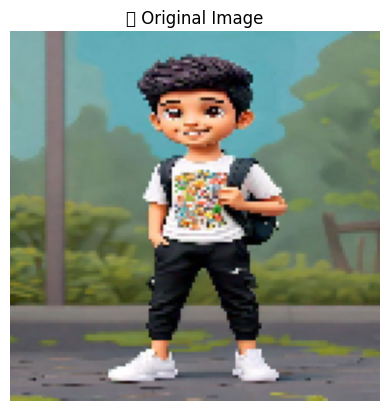

Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 64, 64,    │        896 │ input_layer_8[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 32, 32,    │     18,496 │ conv2d_8[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_4 (Flatten) │ (None, 65536)     │          0 │ conv2d_9[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_12 (Dense)    │ (None, 128)       │  8,388,736 │ flatten_4[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_13 (Dense)    │ (None, 64)        │      8,256 │ dense_12[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_14 (Dense)    │ (None, 64)        │      8,256 │ dense_12[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_3 (Lambda)   │ (None, 64)        │          0 │ dense_13[0][0],   │
│                     │                   │            │ dense_14[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 8,424,640 (32.14 MB)

 Trainable params: 8,424,640 (32.14 MB)

 Non-trainable params: 0 (0.00 B)

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 65536)          │     4,259,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_4 (Reshape)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_12             │ (None, 64, 64, 64)     │        36,928 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_13             │ (None, 128, 128, 32)   │        18,464 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_14             │ (None, 128, 128, 3)    │           867 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,316,099 (16.46 MB)

 Trainable params: 4,316,099 (16.46 MB)

 Non-trainable params: 0 (0.00 B)

✅ Training Complete!


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


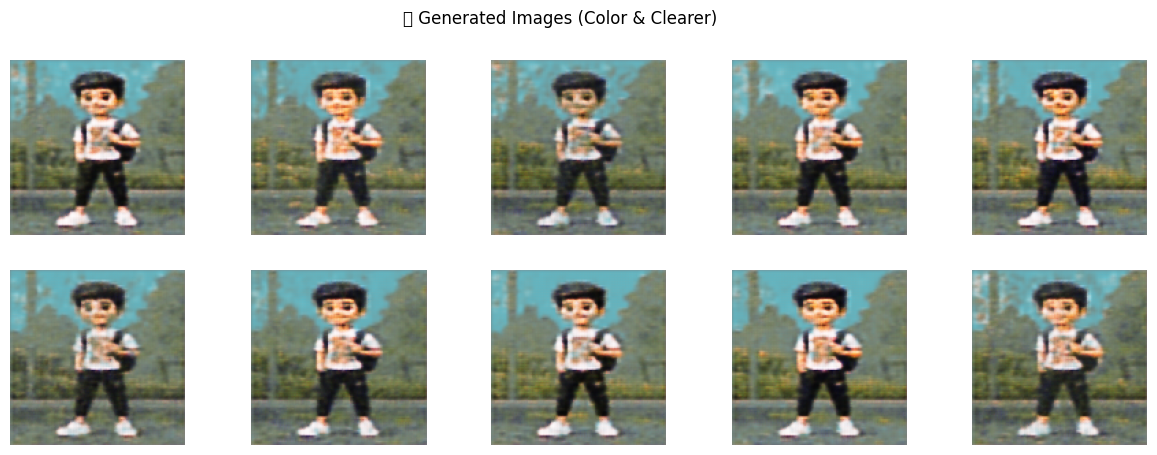

In [ ]:
# Variational Autoencoder (VAE) - Generate Images

# STEP 1: Mount Drive
from google.colab import drive
drive.mount('/content/drive')

# STEP 2: Import Libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

# STEP 3: Load Your Image
image_path = "/content/drive/MyDrive/3d.jpg"

# Read image using OpenCV
img = cv2.imread(image_path)
if img is None:
    raise FileNotFoundError("Image not found. Double-check your filename and Drive path!")

# Convert BGR (OpenCV format) to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Resize image for VAE
img = cv2.resize(img, (128, 128))
img = img.astype('float32') / 255.0
img = np.expand_dims(img, axis=0)

plt.imshow(img[0])
plt.title("🖼️ Original Image")
plt.axis("off")
plt.show()

# STEP 4: Encoder
latent_dim = 64

encoder_inputs = layers.Input(shape=(128, 128, 3))
x = layers.Conv2D(32, 3, activation="relu", strides=2, padding="same")(encoder_inputs)
x = layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Flatten()(x)
x = layers.Dense(128, activation="relu")(x)
z_mean = layers.Dense(latent_dim)(x)
z_log_var = layers.Dense(latent_dim)(x)

def sampling(args):
    z_mean, z_log_var = args
    epsilon = tf.random.normal(shape=(tf.shape(z_mean)[0], latent_dim))
    return z_mean + tf.exp(0.5 * z_log_var) * epsilon

z = layers.Lambda(sampling)([z_mean, z_log_var])
encoder = models.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
encoder.summary()

# STEP 5: Decoder
latent_inputs = layers.Input(shape=(latent_dim,))
x = layers.Dense(32 * 32 * 64, activation="relu")(latent_inputs)
x = layers.Reshape((32, 32, 64))(x)
x = layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)
decoder_outputs = layers.Conv2DTranspose(3, 3, activation="sigmoid", padding="same")(x)
decoder = models.Model(latent_inputs, decoder_outputs, name="decoder")
decoder.summary()

# STEP 6: VAE Model
class VAE(models.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder

    def compile(self, optimizer):
        super(VAE, self).compile()
        self.optimizer = optimizer
        self.total_loss_tracker = tf.keras.metrics.Mean(name="total_loss")

    def train_step(self, data):
        if isinstance(data, tuple):
            data = data[0]
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            reconstruction_loss = tf.reduce_mean(tf.square(data - reconstruction))
            kl_loss = -0.5 * tf.reduce_mean(
                1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var)
            )
            total_loss = reconstruction_loss + kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        return {"loss": self.total_loss_tracker.result()}

vae = VAE(encoder, decoder)
vae.compile(optimizer=tf.keras.optimizers.Adam())

# STEP 7: Train VAE
vae.fit(img, epochs=500, batch_size=1, verbose=0)
print("✅ Training Complete!")

# STEP 8: Generate New Images
num_images = 10
generated_images = []

for i in range(num_images):
    random_latent = tf.random.normal(shape=(1, latent_dim))
    gen_img = decoder(random_latent)
    generated_images.append(gen_img[0].numpy())

# STEP 9: Display Results
plt.figure(figsize=(15, 5))
for i in range(num_images):
    plt.subplot(2, 5, i + 1)
    plt.imshow(generated_images[i])
    plt.axis("off")
plt.suptitle("✨ Generated Images (Color & Clearer)")
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


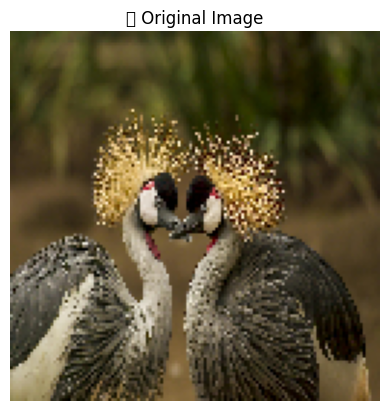

Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_10      │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_10 (Conv2D)  │ (None, 64, 64,    │        896 │ input_layer_10[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_11 (Conv2D)  │ (None, 32, 32,    │     18,496 │ conv2d_10[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_5 (Flatten) │ (None, 65536)     │          0 │ conv2d_11[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_16 (Dense)    │ (None, 128)       │  8,388,736 │ flatten_5[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_17 (Dense)    │ (None, 64)        │      8,256 │ dense_16[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_18 (Dense)    │ (None, 64)        │      8,256 │ dense_16[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_4 (Lambda)   │ (None, 64)        │          0 │ dense_17[0][0],   │
│                     │                   │            │ dense_18[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 8,424,640 (32.14 MB)

 Trainable params: 8,424,640 (32.14 MB)

 Non-trainable params: 0 (0.00 B)

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)     │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 65536)          │     4,259,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_5 (Reshape)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_15             │ (None, 64, 64, 64)     │        36,928 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_16             │ (None, 128, 128, 32)   │        18,464 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_17             │ (None, 128, 128, 3)    │           867 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,316,099 (16.46 MB)

 Trainable params: 4,316,099 (16.46 MB)

 Non-trainable params: 0 (0.00 B)

✅ Training Complete!


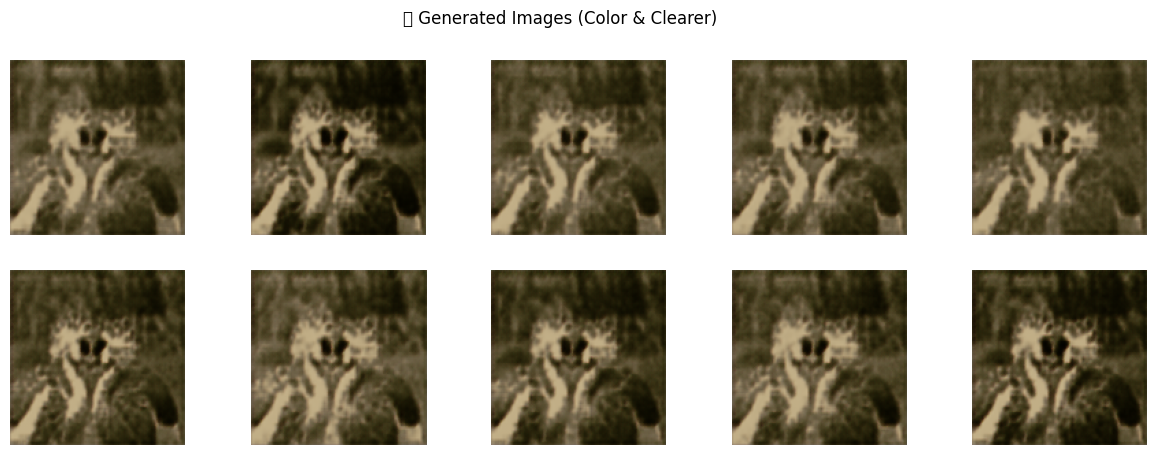

In [ ]:
#  Variational Autoencoder (VAE) - Generate Images


# STEP 1: Mount Drive
from google.colab import drive
drive.mount('/content/drive')

# STEP 2: Import Libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

# STEP 3: Load Your Image
image_path = "/content/drive/MyDrive/aa.jpg"

# Read image using OpenCV
img = cv2.imread(image_path)
if img is None:
    raise FileNotFoundError(" Image not found. Double-check your filename and Drive path!")

# Convert BGR (OpenCV format) to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Resize image for VAE
img = cv2.resize(img, (128, 128))
img = img.astype('float32') / 255.0
img = np.expand_dims(img, axis=0)

plt.imshow(img[0])
plt.title("🖼️ Original Image")
plt.axis("off")
plt.show()

# STEP 4: Encoder
latent_dim = 64

encoder_inputs = layers.Input(shape=(128, 128, 3))
x = layers.Conv2D(32, 3, activation="relu", strides=2, padding="same")(encoder_inputs)
x = layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Flatten()(x)
x = layers.Dense(128, activation="relu")(x)
z_mean = layers.Dense(latent_dim)(x)
z_log_var = layers.Dense(latent_dim)(x)

def sampling(args):
    z_mean, z_log_var = args
    epsilon = tf.random.normal(shape=(tf.shape(z_mean)[0], latent_dim))
    return z_mean + tf.exp(0.5 * z_log_var) * epsilon

z = layers.Lambda(sampling)([z_mean, z_log_var])
encoder = models.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
encoder.summary()

# STEP 5: Decoder
latent_inputs = layers.Input(shape=(latent_dim,))
x = layers.Dense(32 * 32 * 64, activation="relu")(latent_inputs)
x = layers.Reshape((32, 32, 64))(x)
x = layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)
decoder_outputs = layers.Conv2DTranspose(3, 3, activation="sigmoid", padding="same")(x)
decoder = models.Model(latent_inputs, decoder_outputs, name="decoder")
decoder.summary()

# STEP 6: VAE Model
class VAE(models.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder

    def compile(self, optimizer):
        super(VAE, self).compile()
        self.optimizer = optimizer
        self.total_loss_tracker = tf.keras.metrics.Mean(name="total_loss")

    def train_step(self, data):
        if isinstance(data, tuple):
            data = data[0]
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            reconstruction_loss = tf.reduce_mean(tf.square(data - reconstruction))
            kl_loss = -0.5 * tf.reduce_mean(
                1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var)
            )
            total_loss = reconstruction_loss + kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        return {"loss": self.total_loss_tracker.result()}

vae = VAE(encoder, decoder)
vae.compile(optimizer=tf.keras.optimizers.Adam())

# STEP 7: Train VAE
vae.fit(img, epochs=500, batch_size=1, verbose=0)
print("✅ Training Complete!")

# STEP 8: Generate New Images
num_images = 10
generated_images = []

for i in range(num_images):
    random_latent = tf.random.normal(shape=(1, latent_dim))
    gen_img = decoder(random_latent)
    generated_images.append(gen_img[0].numpy())

# STEP 9: Display Results
plt.figure(figsize=(15, 5))
for i in range(num_images):
    plt.subplot(2, 5, i + 1)
    plt.imshow(generated_images[i])
    plt.axis("off")
plt.suptitle("✨ Generated Images (Color & Clearer)")
plt.show()


In [ ]:
# Run in Colab or local environment with TensorFlow installed (tested with TF 2.11+)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np

# 1) Load CIFAR-100
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar100.load_data(label_mode='fine')
num_classes = 100

# Normalize to [0,1]
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test  = keras.utils.to_categorical(y_test, num_classes)

print("Train:", x_train.shape, "Test:", x_test.shape)

# Optional: small validation split
val_split = 0.1
num_val = int(len(x_train) * val_split)
x_val = x_train[:num_val]; y_val = y_train[:num_val]
x_tr  = x_train[num_val:]; y_tr = y_train[num_val:]

# 2) Build a convolutional autoencoder (encoder + decoder)
input_shape = x_train.shape[1:]  # (32,32,3)

encoder_input = keras.Input(shape=input_shape)

# Encoder: conv downsampling -> feature map
x = layers.Conv2D(64, 3, padding='same', activation='relu')(encoder_input)  # 32x32x64
x = layers.MaxPooling2D(2, padding='same')(x)                               # 16x16x64
x = layers.Conv2D(128, 3, padding='same', activation='relu')(x)             # 16x16x128
x = layers.MaxPooling2D(2, padding='same')(x)                               # 8x8x128
x = layers.Conv2D(256, 3, padding='same', activation='relu')(x)             # 8x8x256
encoded = layers.MaxPooling2D(2, padding='same', name='encoded')(x)        # 4x4x256  <- encoder output

# Decoder: upsampling back to 32x32x3
x = layers.Conv2D(256, 3, padding='same', activation='relu')(encoded)
x = layers.UpSampling2D(2)(x)                                               # 8x8x256
x = layers.Conv2D(128, 3, padding='same', activation='relu')(x)
x = layers.UpSampling2D(2)(x)                                               # 16x16x128
x = layers.Conv2D(64, 3, padding='same', activation='relu')(x)
x = layers.UpSampling2D(2)(x)                                               # 32x32x64
decoded = layers.Conv2D(3, 3, padding='same', activation='sigmoid')(x)      # 32x32x3

autoencoder = keras.Model(encoder_input, decoded, name='autoencoder')
encoder = keras.Model(encoder_input, encoded, name='encoder')  # separate encoder model

autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()

# 3) Train the autoencoder (short epochs for demo; increase for better features)
epochs_ae = 10
batch_size = 128

history_ae = autoencoder.fit(
    x_tr, x_tr,
    epochs=epochs_ae,
    batch_size=batch_size,
    shuffle=True,
    validation_data=(x_val, x_val)
)

# Save encoder weights (optional)
encoder.save_weights('encoder_weights.h5')

# 4) Build the classifier that takes encoder output as input
# Option A: take the 4x4x256 feature map and add conv + dense classifier on top

# Build a model whose input is the same input as encoder_input, but output is classification
feat = encoder(encoder_input)  # 4x4x256

# Add classifier layers (a small CNN on top of the encoded feature maps)
x = layers.Conv2D(256, 3, padding='same', activation='relu')(feat)
x = layers.GlobalAveragePooling2D()(x)     # -> vector
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
classifier_output = layers.Dense(num_classes, activation='softmax')(x)

classifier = keras.Model(encoder_input, classifier_output, name='encoder_plus_cnn')
classifier.summary()

# Option: Freeze encoder first (transfer learning style)
for layer in encoder.layers:
    layer.trainable = False

classifier.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 5) Train classifier (phase 1: encoder frozen)
epochs_cls_phase1 = 20
history_clf1 = classifier.fit(
    x_tr, y_tr,
    epochs=epochs_cls_phase1,
    batch_size=128,
    validation_data=(x_val, y_val)
)

# 6) Optional: unfreeze encoder and fine-tune entire model
for layer in encoder.layers:
    layer.trainable = True

# Recompile with lower LR for fine-tuning
classifier.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

epochs_cls_phase2 = 20
history_clf2 = classifier.fit(
    x_tr, y_tr,
    epochs=epochs_cls_phase2,
    batch_size=128,
    validation_data=(x_val, y_val)
)

# 7) Evaluate on test set
test_loss, test_acc = classifier.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}, loss: {test_loss:.4f}")


In [ ]:
# ==========================================================
# ✅ CIFAR-100 + Variational Autoencoder + CNN Classifier
# ==========================================================

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar100
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from tensorflow.keras.preprocessing import image

# -----------------------------
# 1. Load CIFAR-100 (10,000 samples for speed)
# -----------------------------
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')
x_train, y_train = x_train[:10000] / 255.0, y_train[:10000]
x_test, y_test = x_test[:2000] / 255.0, y_test[:2000]

input_shape = (32, 32, 3)
latent_dim = 128

# -----------------------------
# 2. Define Encoder
# -----------------------------
encoder_inputs = layers.Input(shape=input_shape)
x = layers.Conv2D(32, 3, padding='same', activation='relu')(encoder_inputs)
x = layers.MaxPooling2D()(x)
x = layers.Conv2D(64, 3, padding='same', activation='relu')(x)
x = layers.MaxPooling2D()(x)
x = layers.Conv2D(128, 3, padding='same', activation='relu')(x)
x = layers.Flatten()(x)
x = layers.Dense(256, activation='relu')(x)

z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)

# Sampling layer
def sampling(args):
    z_mean, z_log_var = args
    epsilon = tf.random.normal(shape=tf.shape(z_mean))
    return z_mean + tf.exp(0.5 * z_log_var) * epsilon

z = layers.Lambda(sampling, name="z")([z_mean, z_log_var])
encoder = models.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
encoder.summary()

# -----------------------------
# 3. Define Decoder
# -----------------------------
latent_inputs = layers.Input(shape=(latent_dim,))
x = layers.Dense(4 * 4 * 128, activation='relu')(latent_inputs)
x = layers.Reshape((4, 4, 128))(x)
x = layers.Conv2DTranspose(128, 3, strides=2, padding='same', activation='relu')(x)
x = layers.Conv2DTranspose(64, 3, strides=2, padding='same', activation='relu')(x)
x = layers.Conv2DTranspose(32, 3, padding='same', activation='relu')(x)
decoder_outputs = layers.Conv2DTranspose(3, 3, padding='same', activation='sigmoid')(x)
decoder = models.Model(latent_inputs, decoder_outputs, name="decoder")
decoder.summary()

# -----------------------------
# 4. Custom VAE model class
# -----------------------------
class VAE(tf.keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = tf.keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = tf.keras.metrics.Mean(name="reconstruction_loss")
        self.kl_loss_tracker = tf.keras.metrics.Mean(name="kl_loss")

    def train_step(self, data):
        if isinstance(data, tuple):
            data = data[0]
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(tf.keras.losses.mean_squared_error(data, reconstruction), axis=(1, 2))
            )
            kl_loss = -0.5 * tf.reduce_mean(
                tf.reduce_sum(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var), axis=1)
            )
            total_loss = reconstruction_loss + kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }

# Instantiate & train
vae = VAE(encoder, decoder)
vae.compile(optimizer=tf.keras.optimizers.Adam())
vae.fit(x_train, epochs=20, batch_size=128, validation_data=(x_test, None))

# -----------------------------
# 5. CNN classifier on latent space
# -----------------------------
z_train_mean, _, _ = encoder.predict(x_train)
z_test_mean, _, _ = encoder.predict(x_test)

cnn = models.Sequential([
    layers.Input(shape=(latent_dim,)),
    layers.Reshape((latent_dim, 1, 1)),
    layers.Conv2D(32, (3, 1), activation='relu', padding='same'),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(100, activation='softmax')
])

cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn.fit(z_train_mean, y_train, epochs=15, batch_size=128, validation_data=(z_test_mean, y_test))

# -----------------------------
# 6. Upload & Predict custom image
# -----------------------------
uploaded = files.upload()

# CIFAR-100 label names
cifar100_labels = [
 'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle',
 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle',
 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard',
 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain',
 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree',
 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar',
 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm'
]

for filename in uploaded.keys():
    img_path = filename
    img = image.load_img(img_path, target_size=(32, 32))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    z_mean, _, _ = encoder.predict(img_array)
    preds = cnn.predict(z_mean)
    predicted_class = np.argmax(preds)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted: {cifar100_labels[predicted_class]}")
    plt.show()


Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 32, 32,    │        896 │ input_layer_6[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_6     │ (None, 16, 16,    │          0 │ conv2d_9[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_10 (Conv2D)  │ (None, 16, 16,    │     18,496 │ max_pooling2d_6[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_7     │ (None, 8, 8, 64)  │          0 │ conv2d_10[0][0]   │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_11 (Conv2D)  │ (None, 8, 8, 128) │     73,856 │ max_pooling2d_7[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_3 (Flatten) │ (None, 8192)      │          0 │ conv2d_11[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 256)       │  2,097,408 │ flatten_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_mean (Dense)      │ (None, 128)       │     32,896 │ dense_6[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_log_var (Dense)   │ (None, 128)       │     32,896 │ dense_6[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z (Lambda)          │ (None, 128)       │          0 │ z_mean[0][0],     │
│                     │                   │            │ z_log_var[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,256,448 (8.61 MB)

 Trainable params: 2,256,448 (8.61 MB)

 Non-trainable params: 0 (0.00 B)

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 2048)           │       264,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_3 (Reshape)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_12             │ (None, 8, 8, 128)      │       147,584 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_13             │ (None, 16, 16, 64)     │        73,792 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_14             │ (None, 16, 16, 32)     │        18,464 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_15             │ (None, 16, 16, 3)      │           867 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 504,899 (1.93 MB)

 Trainable params: 504,899 (1.93 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20


AttributeError: module 'keras._tf_keras.keras.losses' has no attribute 'mean_squared_error'